Q1 : Can you build a random path simulator for building up from Bernoulli distribution? 

a. Poisson Process

b. Brownian Motion

Poisson Process
==========

In [15]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

def poisson_process(lambda_, time_steps, realizations):
    X_T = [np.random.poisson(lambda_, size=time_steps) for realization in range(realizations)]

    S = [[np.sum(X[0:i]) for i in range(time_steps)] for X in X_T]
    X = np.linspace(0, time_steps, time_steps)
    return X, S, X_T


def get_expected(X):
    expected = sum(X) / len(X)
    return expected

def get_variance(X):
    m = get_expected(X)
    variance = sum((xi - m) ** 2 for xi in X) / len(X)
    return variance

def get_covariance(X1, X2):
    X = np.stack((X1, X2), axis=0)
    covariance = np.cov(X)
    return covariance

def print_results(X_T1, X_T2, realizations):
    for realization in range(realizations):
        print("================================================================")
        print("Realization: %d" % int(realization+1))
        print("================================================================")

        expected = get_expected(X_T1[realization])
        variance = get_variance(X_T1[realization])
        covariance = get_covariance(X_T1[realization], X_T2[realization])
        print("λ: %f\nExpected: %f\nVariance: %f\nCovariance:" %(lambda_, expected, variance))
        print(covariance)
        print("\n")

    
def show_poisson_graph(arrival_times, cum_X_T):
    graphs = [plt.step(arrival_times1, cum_X_T[i], label="Realization = %d"%i)[0] for i in range(len(cum_X_T))]
    plt.legend(handles=graphs, loc=2)
    plt.title('Poisson Process', fontsize=20)
    plt.xlabel('Arrival Time', fontsize=16)
    plt.ylabel('Events Observed', fontsize=16)
    plt.grid(True)
    


Realization: 1
λ: 0.500000
Expected: 0.540000
Variance: 0.528400
Covariance:
[[ 0.53373737 -0.05919192]
 [-0.05919192  0.52717172]]


Realization: 2
λ: 0.500000
Expected: 0.470000
Variance: 0.389100
Covariance:
[[ 0.3930303  -0.00686869]
 [-0.00686869  0.43070707]]


Realization: 3
λ: 0.500000
Expected: 0.600000
Variance: 0.540000
Covariance:
[[ 0.54545455 -0.02424242]
 [-0.02424242  0.32111111]]


Realization: 4
λ: 0.500000
Expected: 0.530000
Variance: 0.449100
Covariance:
[[0.45363636 0.01636364]
 [0.01636364 0.55393939]]


Realization: 5
λ: 0.500000
Expected: 0.450000
Variance: 0.427500
Covariance:
[[ 0.43181818 -0.03080808]
 [-0.03080808  0.47464646]]




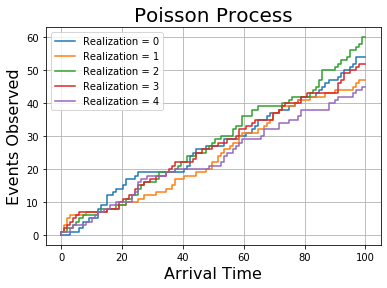

In [18]:
lambda_ = 0.5
time_steps = 100
realizations = 5

arrival_times1, cum_X_T1, X_T1 = poisson_process(lambda_, time_steps, realizations)
arrival_times2, cum_X_T2, X_T2 = poisson_process(lambda_, time_steps, realizations)
show_poisson_graph(arrival_times1, cum_X_T1)
print_results(X_T1, X_T2, realizations)

Brownian Motion
==========
- 
**1D Discretized Brownian Paths** 
- 
**2D Animated Discretized Brownian Path** 
- 
**3D Discretized Brownian Paths**


In [149]:
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

np.random.seed(5)

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)


def brownian_motion(dt, N):
    
    # allocate arrays for rand var X and increment dX
    X = [0] * N
    dX = [0] * N

    # set first element to the initial condition
    # where np.random.rand() i sused to generate a
    # random var from the normal distribution
    dX[0] = np.sqrt(dt) * np.random.randn() 
    X[0] = dX[0]

    for j in range(1, N):
        dX[j] = np.sqrt(dt) * np.random.randn()
        X[j] = X[j-1] + dX[j]
    
    #lineData = np.vstack((X, Y))
    #print(lineData)
    return X

def get_expected(X):
    expected = sum(X) / len(X)
    return expected

def get_variance(X):
    m = get_expected(X)
    variance = sum((xi - m) ** 2 for xi in X) / len(X)
    return variance

def get_covariance(X1, X2):
    X = np.stack((X1, X2), axis=0)
    covariance = np.cov(X)
    return covariance

def print_results(X_T1, X_T2, realizations):
    for realization in range(realizations):
        print("================================================================")
        print("Realization: %d" % int(realization+1))
        print("================================================================")

        expected = get_expected(X_T1[realization])
        variance = get_variance(X_T1[realization])
        covariance = get_covariance(X_T1[realization], X_T2[realization])
        print("Expected: %f\nVariance: %f\nCovariance:" %(expected, variance))
        print(covariance)
        print("\n")

def show_brownian_1d_graph(T, N, data, realizations):
    dt = T/(N-1)
    t = np.linspace(0.0, N*dt, N)
    fig, ax = plt.subplots()
    ax = plt.axes(xlim=(0, T), ylim=(-(T+1), T+1))
    ax.set_xlabel("Time")
    ax.set_ylabel("Position")
    ax.set_title("1D Brownian Motion")
    for k in range(realizations):
        plt.plot(t, data[k], label="Path %s" % str(k+1))
    plt.legend(loc=1)
    plt.tight_layout()
    plt.grid(True)
    plt.show()
        

<IPython.core.display.Javascript object>


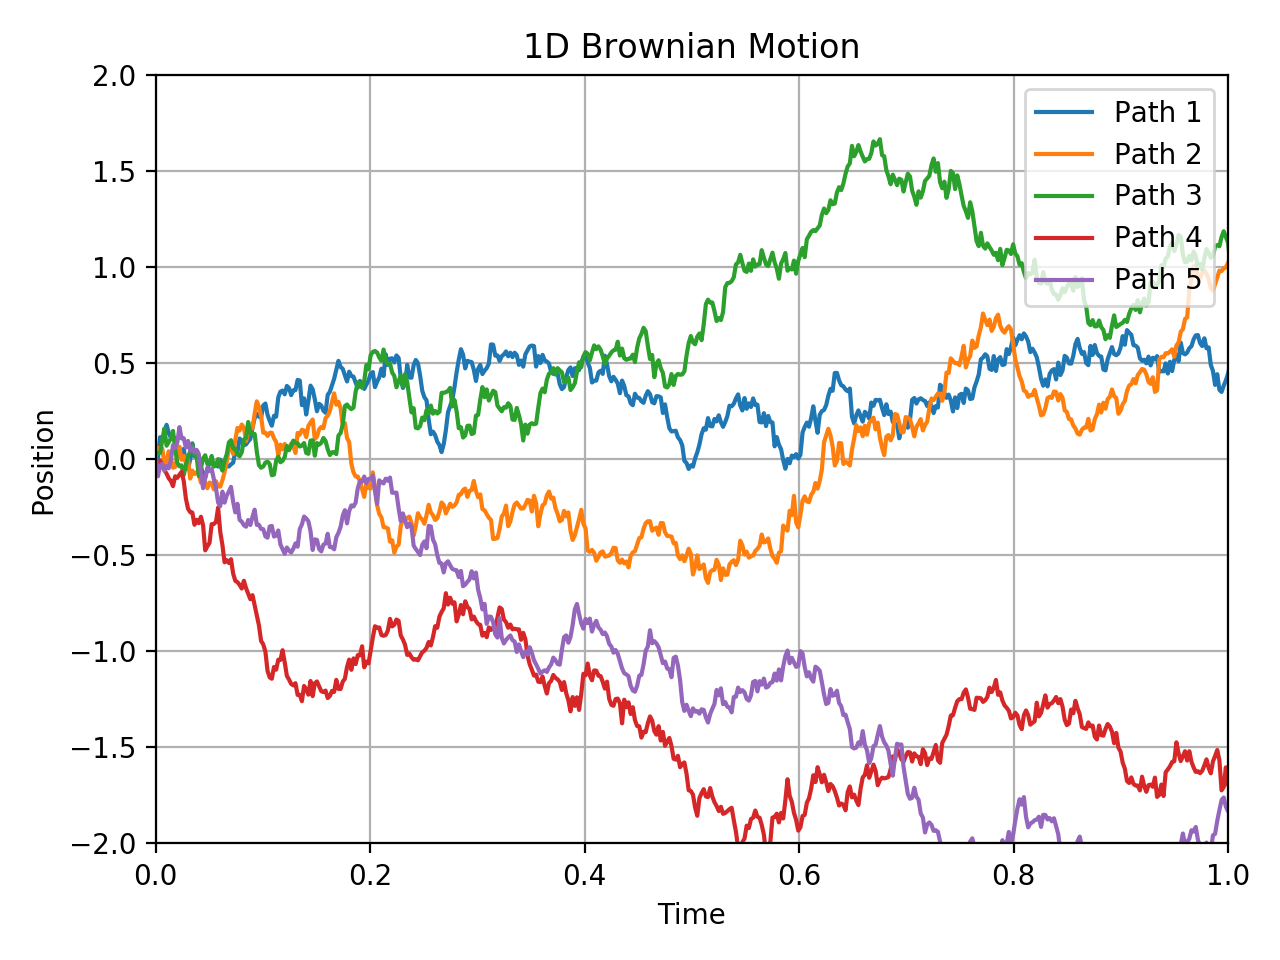

Realization: 1
Expected: 0.344434
Variance: 0.033054
Covariance:
[[ 0.03312035 -0.01403354]
 [-0.01403354  0.12191452]]


Realization: 2
Expected: 0.010588
Variance: 0.156348
Covariance:
[[0.15666046 0.14459021]
 [0.14459021 0.25082389]]


Realization: 3
Expected: 0.679532
Variance: 0.228354
Covariance:
[[0.22881107 0.30137012]
 [0.30137012 0.66782713]]


Realization: 4
Expected: -1.269472
Variance: 0.185440
Covariance:
[[0.18581064 0.11865858]
 [0.11865858 0.13341034]]


Realization: 5
Expected: -1.150129
Variance: 0.484482
Covariance:
[[0.48545095 0.37480029]
 [0.37480029 0.34905855]]




In [150]:
N = 501 # Number of points
T = 1.0
dt = T/(N-1)
realizations = 5

data1 = [brownian_motion(dt, N) for i in range(realizations)]
data2 = [brownian_motion(dt, N) for i in range(realizations)]

show_brownian_1d_graph(T, N, data1, realizations)
print_results(data1, data2, realizations)

<IPython.core.display.Javascript object>


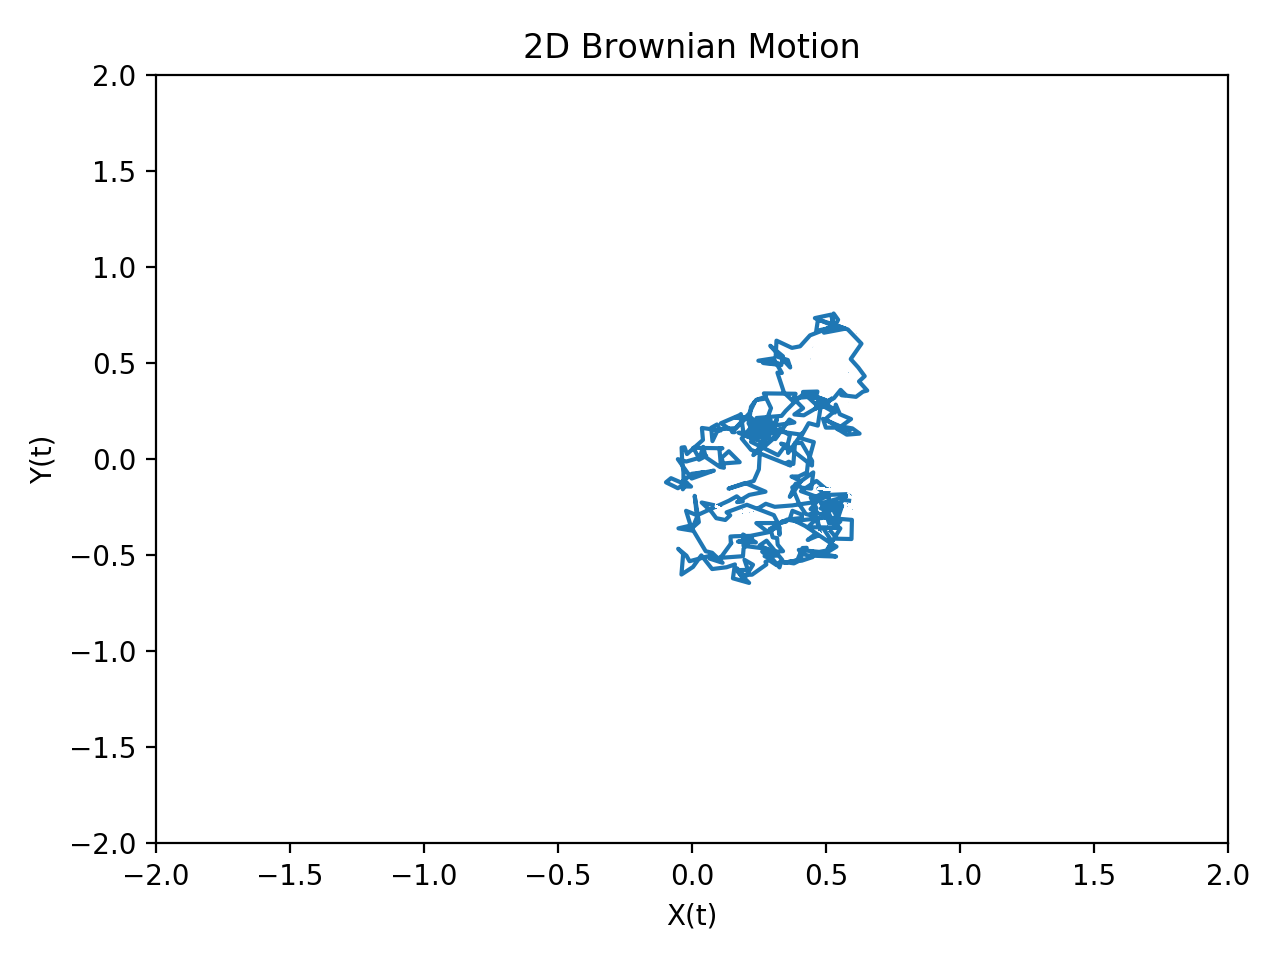

In [144]:
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook


np.random.seed(5)


# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

# Returns Line2D objects
def updateLines(num, dataLines, lines):
    for u, v in zip(lines, dataLines):
        u.set_data(v[0:2, :num])

    return lines

N = 501 # Number of points
T = 1.0
dt = T/(N-1)

fig, ax = plt.subplots()

data1 = brownian_motion(dt, N)
data2 = brownian_motion(dt, N)

data = [np.vstack((data1, data2))]

ax = plt.axes(xlim=(-2.0, 2.0), ylim=(-2.0, 2.0))
ax.set_xlabel('X(t)')
ax.set_ylabel('Y(t)')
ax.set_title('2D Brownian Motion')

lines = [ax.plot(dat[0, 0:1], dat[1, 0:1])[0] for dat in data]

anim = animation.FuncAnimation(fig, updateLines, N+1, fargs=(data, lines),
                                   interval=30, repeat=True, blit=False)

plt.tight_layout()

plt.show()



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.7/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


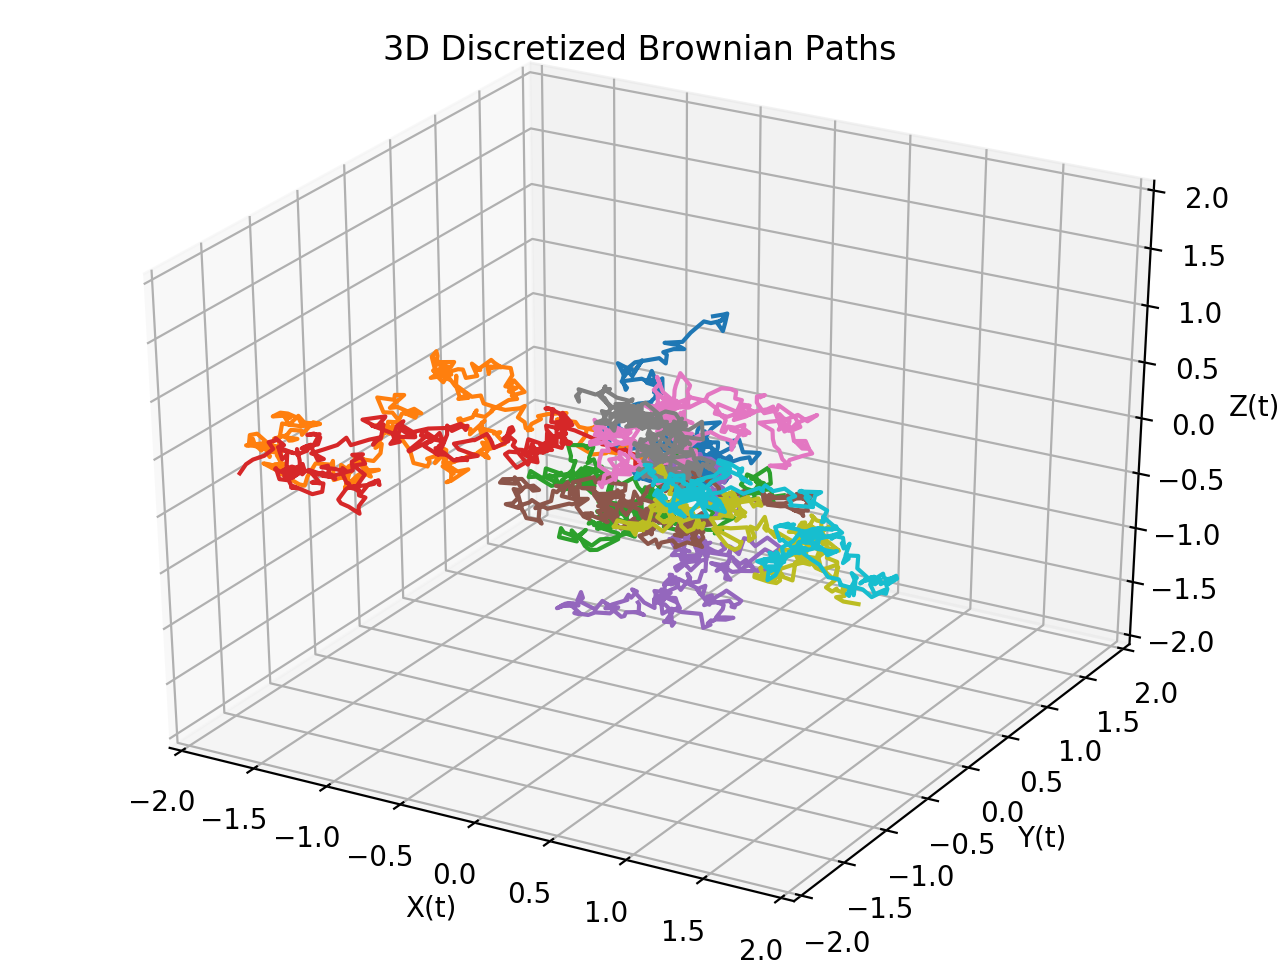

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


In [93]:
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import mpl_toolkits.mplot3d.axes3d as p3
%matplotlib notebook

np.random.seed(5)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

def updateLines(num, dataLines, lines, dims):
    for u, v in zip(lines, dataLines):
        if dims == 2:
            u.set_data(v[0:2, :num])
        elif dims == 3:
            u.set_data(v[0:2, :num])
            u.set_3d_properties(v[2, :num])

    return lines

dims = 3
N = 501
T = 1.0
dt = T/(N-1)
numPaths = 10

data = [np.vstack((brownian_motion(dt, N), brownian_motion(dt, N), brownian_motion(dt, N))) for index in range(numPaths)]

if dims == 2:
    fig, ax = plt.subplots()
    ax = plt.axes(xlim=(-2.0, 2.0), ylim=(-2.0, 2.0))
    ax.set_xlabel('X(t)')
    ax.set_ylabel('Y(t)')
    ax.set_title('2D Discretized Brownian Paths')
    lines = [ax.plot(dat[0, 0:1], dat[1, 0:1])[0] for dat in data]

elif dims == 3:
    fig = plt.figure()
    ax = p3.Axes3D(fig)
    ax.set_xlim3d([-2.0, 2.0])
    ax.set_xlabel('X(t)')

    ax.set_ylim3d([-2.0, 2.0])
    ax.set_ylabel('Y(t)')

    ax.set_zlim3d([-2.0, 2.0])
    ax.set_zlabel('Z(t)')
    
    ax.set_title('3D Discretized Brownian Paths')
    
    lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

anim = animation.FuncAnimation(fig, updateLines, N+1, fargs=(data, lines, dims),
                                   interval=30, repeat=True, blit=False)

plt.tight_layout()
plt.show()



Continuous Time Markov Process 
==========

**Simple Birth Process (Yule Process)** 
- **Birth Probability Distribution** 


In [151]:
# Simple Birth Process
# (Yule Process)

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(100)
  

def simple_birth(birth_rate, init_pop, max_pop, realizations):  
    arrival_times = np.zeros((realizations, max_pop))
    births = np.zeros((realizations, max_pop))
    births[:,0] = init_pop
    
    for realization in range(realizations):
        for i in range(max_pop-1):
            interarrival_time = - np.log(np.random.rand())/(birth_rate*births[realization, i])
            arrival_times[realization, i+1] = arrival_times[realization, i] + interarrival_time
            births[realization,i+1] = births[realization,i] + 1
    
    return [arrival_times, births]

def deterministic_birth(birth_rate, init_pop, max_pop, arrival_times):
    T = max(arrival_times[:, -1])
    t = np.linspace(0, T, 10*max_pop)
    pop = init_pop*np.exp(birth_rate*t)
    
    return[t, pop]

def show_simple_birth_graph(birth_rate, init_pop, max_pop, realizations):
    fig, ax = plt.subplots()
    
    [arrival_times, population] = simple_birth(birth_rate, init_pop, max_pop, realizations)
    [time, deterministic_arrivals] = deterministic_birth(birth_rate, init_pop, max_pop, arrival_times)
    
    ## Sets axis ranges for plotting
    x_max_axis = max([max(arrival_times[realization,:]) for realization in range(realizations)])
    y_min_axis = min([min(population[realization,:]) for realization in range(realizations)])
    y_max_axis = max([max(population[realization,:]) for realization in range(realizations)])
    
    ## Generates plots
    for realization in range(realizations):
        plt.step(arrival_times[realization,:], population[realization,:], where='post', label="Path %s" % str(realization+1))
        
    plt.plot(time, deterministic_arrivals, 'k--', label="Deterministic")
    plt.axis([0.0, x_max_axis+0.2, y_min_axis, y_max_axis+2])
    ax.set_title('Simple Births', fontsize=20)
    ax.set_xlabel('Time', fontsize=16)
    ax.set_ylabel('Population Size', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()
    plt.legend(loc=2)
    plt.grid(True)
    #plt.show()
    

<IPython.core.display.Javascript object>


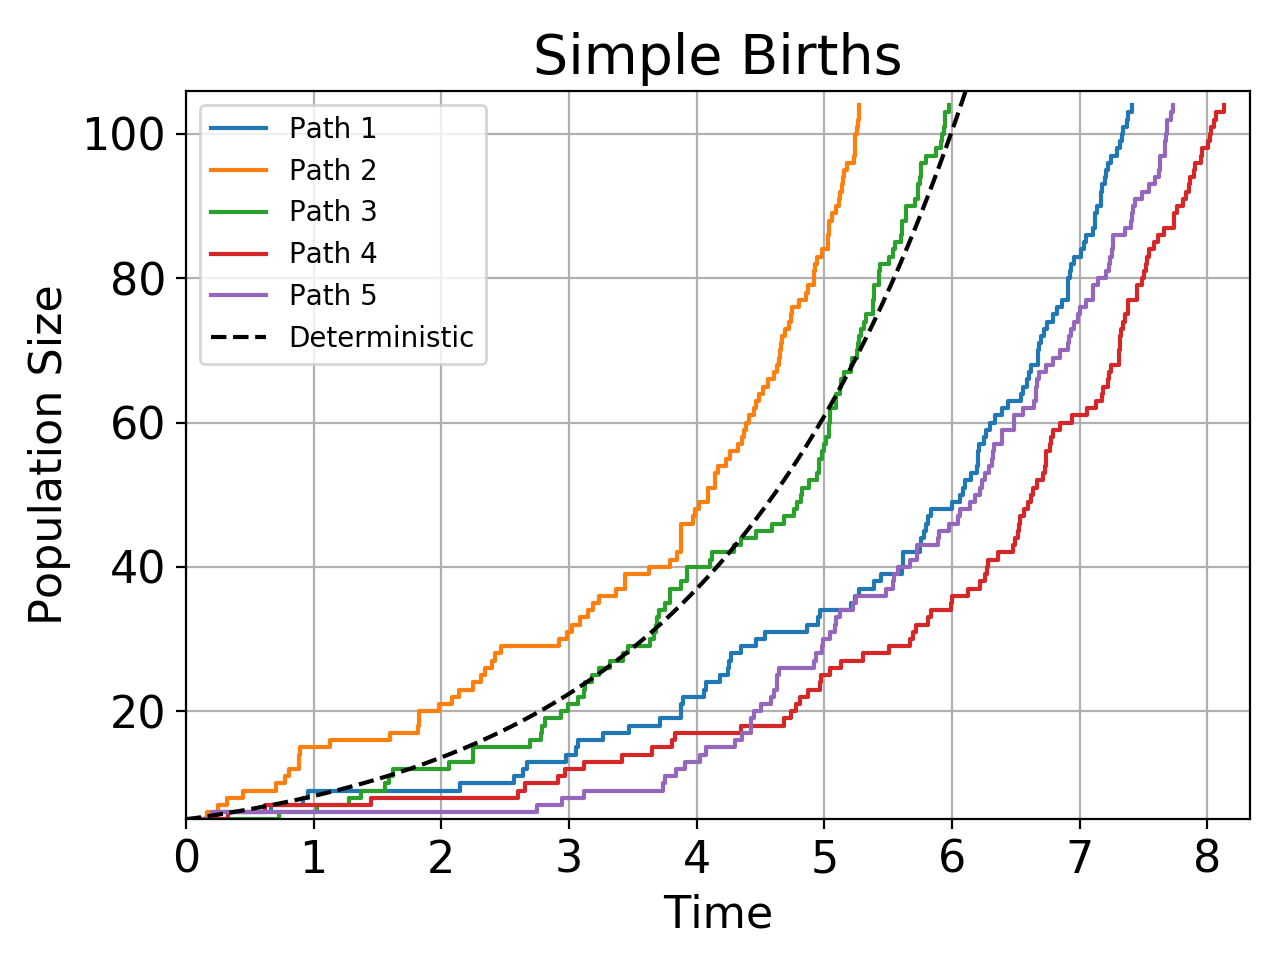

In [152]:
max_pop = 100
realizations = 5
birth_rate = 0.5
init_pop = 5   
 
show_simple_birth_graph(birth_rate, init_pop, max_pop, realizations)   

**Simple Death Process** 
- **Death Probability Distribution**


In [153]:
# Simple Death Process

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(100)


def simple_death(death_rate, init_pop, max_pop, realizations):  
    arrival_times = np.zeros((realizations, max_pop))
    deaths = np.zeros((realizations, max_pop))
    deaths[:,0] = init_pop
    
    for realization in range(realizations):
        for i in range(max_pop-1):
            interarrival_time = - np.log(np.random.rand())/(death_rate*deaths[realization, i])
            arrival_times[realization, i+1] = arrival_times[realization, i] + interarrival_time
            deaths[realization,i+1] = deaths[realization,i] - 1
    
    return [arrival_times, deaths]


def deterministic_death(death_rate, init_pop, max_pop, arrival_times):
    T = max(arrival_times[:, -1])
    t = np.linspace(0, T, 10*max_pop)
    pop = init_pop*np.exp(-death_rate*t)
    
    return[t, pop]

def show_simple_death_graph(death_rate, init_pop, max_pop, realizations):
    fig, ax = plt.subplots()
    
    [arrival_times, population] = simple_death(death_rate, init_pop, max_pop, realizations)
    [time, deterministic_arrivals] = deterministic_death(death_rate, init_pop, max_pop, arrival_times)
    
    ## Sets axis ranges for plotting
    x_max_axis = max([max(arrival_times[realization,:]) for realization in range(realizations)])
    y_min_axis = min([min(population[realization,:]) for realization in range(realizations)])
    y_max_axis = max([max(population[realization,:]) for realization in range(realizations)])
    
    ## Generates plots
    for realization in range(realizations):
        plt.step(arrival_times[realization,:], population[realization,:], where='post', label="Path %s" % str(realization+1))
        
    plt.plot(time, deterministic_arrivals, 'k--', label="Deterministic")
    plt.axis([0.0, x_max_axis+0.2, y_min_axis, y_max_axis+2])
    ax.set_title('Simple Deaths', fontsize=20)
    ax.set_xlabel('Time', fontsize=16)
    ax.set_ylabel('Population Size', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()
    plt.legend(loc=2)
    plt.grid(True)
    #plt.show()
    


<IPython.core.display.Javascript object>


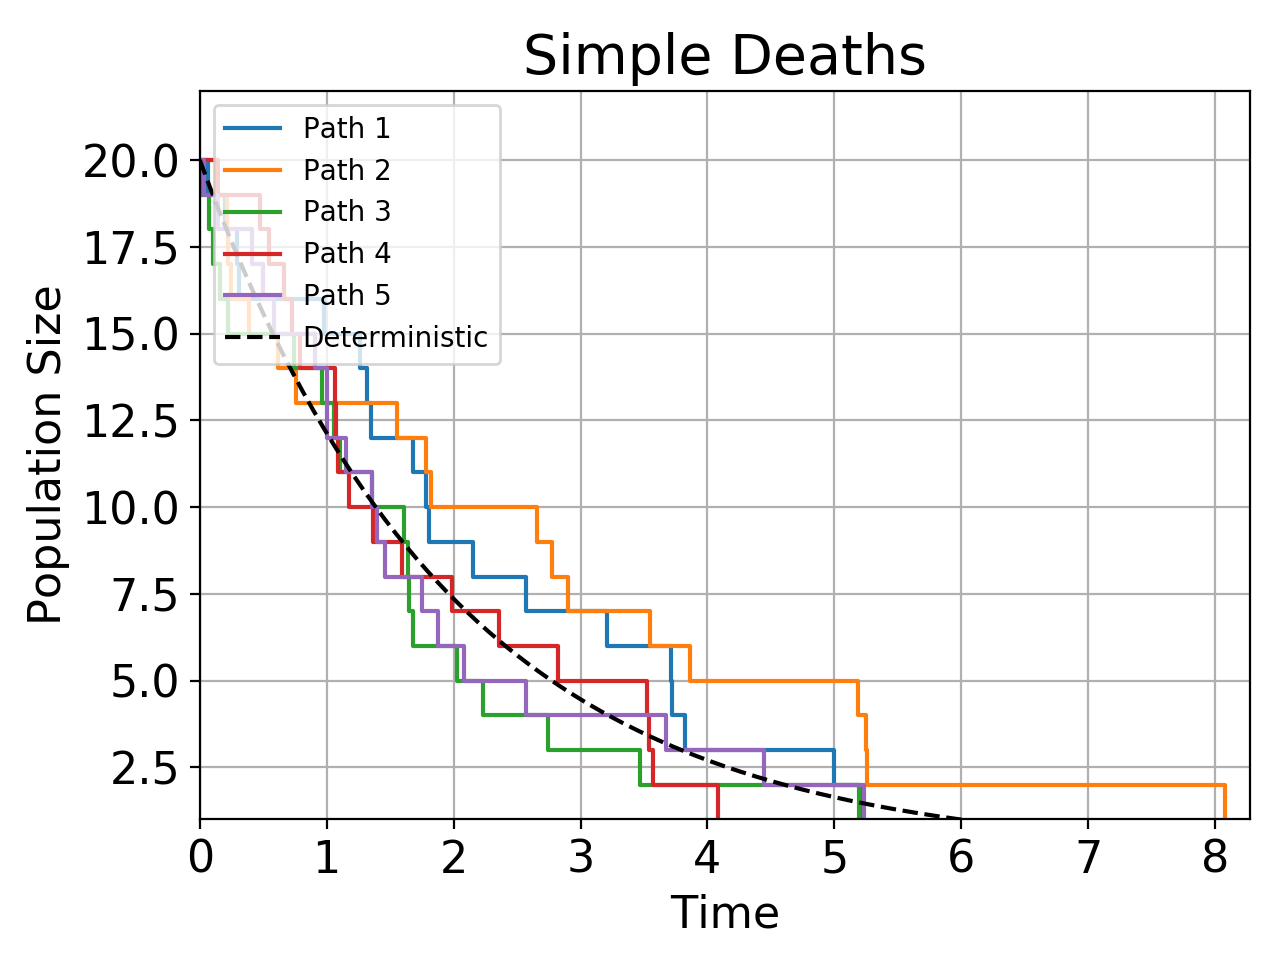

In [154]:
max_pop = 20
realizations = 5 
death_rate = 0.5
init_pop = max_pop   
 
show_simple_death_graph(death_rate, init_pop, max_pop, realizations) 

**Simple Birth and Death Process**

In [155]:
# Simple Birth and Death Process

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(100)


def simple_birth_death(birth_rate, death_rate, init_pop, max_pop, realizations):  
    arrival_times = np.zeros((realizations, max_pop))
    population = np.zeros((realizations, max_pop))
    
    arrival_times[:,0] = 0.001
    population[:,0] = init_pop
    
    
    for realization in range(realizations):
        i = 0
        while population[realization, i] > 0 and i < (max_pop-1):
            u1 = np.random.rand()
            u2 = np.random.rand()
            
            interarrival_time = -np.log(u1)/((birth_rate+death_rate)*population[realization,i])
            arrival_times[realization,i+1] = arrival_times[realization,i] + interarrival_time

            if u2 < birth_rate/(birth_rate+death_rate):
                population[realization,i+1] = population[realization,i] + 1 # birth occurs
            else:
                population[realization,i+1] = population[realization,i] - 1 # death occurs
                
            i += 1
    
    return [arrival_times, population]
    

def show_simple_birth_death_graph(birth_rate, death_rate, init_pop, max_pop, realizations):
    fig, ax = plt.subplots()
    
    [arrival_times, population] = simple_birth_death(birth_rate, death_rate, init_pop, max_pop, realizations)

    
    xmax = min([max(arrival_times[realization,:]) for realization in range(realizations)])
    #ymin = min([min(population[k,:]) for k in range(paths)])
    ymax = max([max(population[realization,:]) for realization in range(realizations)])
    
    arrival_times[arrival_times==0] = np.nan
    
    ## Generates plots
    for realization in range(realizations):
        plt.step(arrival_times[realization,:], population[realization,:], where='pre', label="Path %s" % str(realization+1))
        
    plt.axis([-0.1, xmax+0.2, 0, ymax+2])
    ax.set_title('Simple Birth and Death Process', fontsize=20)
    ax.set_xlabel('Time', fontsize=16)
    ax.set_ylabel('Population', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()
    plt.legend(loc=1)
    plt.grid(True)
    plt.show()


<IPython.core.display.Javascript object>


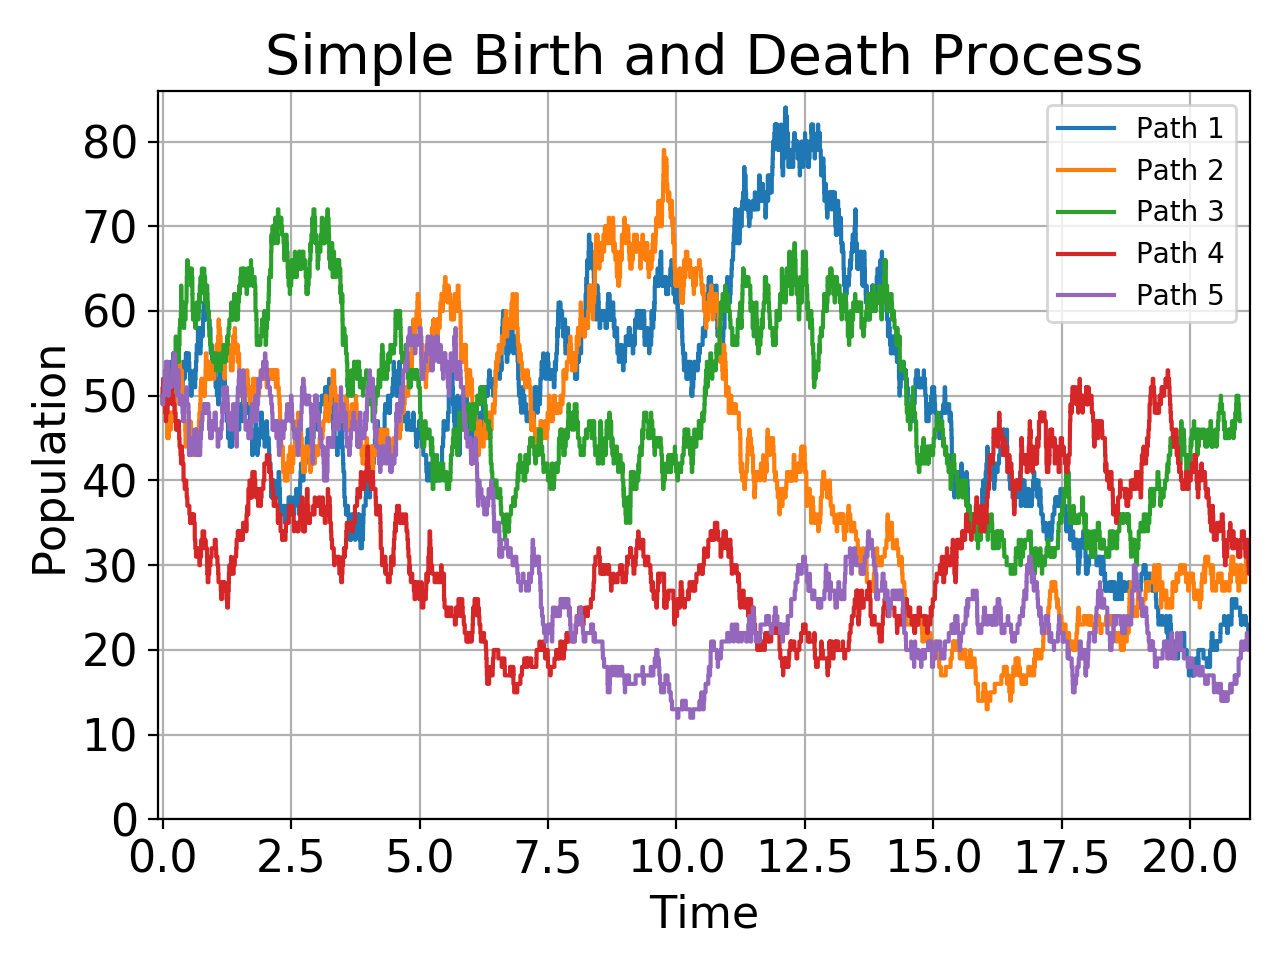

In [156]:
init_pop = 50
max_pop = 2000
realizations = 5  
birth_rate = 1.0
death_rate = 1.0  
    
show_simple_birth_death_graph(birth_rate, death_rate, init_pop, max_pop, realizations)

**Simple Birth and Death Process with Immigration**

In [161]:
# Simple Birth and Death Process with Immigration

import numpy as np
import matplotlib.pyplot as plt


np.random.seed(10)

def simple_birth_death_immigration(birth_rate, death_rate, immigration, init_pop, max_pop, realizations):  
    arrival_times = np.zeros((realizations, max_pop))
    population = np.zeros((realizations, max_pop))
    
    arrival_times[:,0] = 0.0
    population[:,0] = init_pop
    
    
    for realization in range(realizations):
        i = 0
        while population[realization, i] > 0 and i < (max_pop-1):
            u1 = np.random.rand()
            u2 = np.random.rand()
            
            interarrival_time = -np.log(u1)/((birth_rate+death_rate)*population[realization,i]+immigration)
            arrival_times[realization,i+1] = arrival_times[realization,i] + interarrival_time

            if u2 < birth_rate*population[realization,i]/((birth_rate+death_rate)*population[realization,i]+immigration):
                population[realization,i+1] = population[realization,i] + 1 # birth occurs
            elif u2 >= birth_rate*population[realization,i]/((birth_rate+death_rate)*population[realization,i]+immigration)\
            and u2 < (birth_rate+death_rate)*population[realization,i]/((birth_rate+death_rate)*population[realization,i]+immigration):
                population[realization,i+1] = population[realization,i] - 1 # death occurs
            elif u2 >= (birth_rate+death_rate)*population[realization,i]/((birth_rate+death_rate)*population[realization,i]+immigration):
                population[realization,i+1] = population[realization,i] + 1 # birth occurs
            i += 1
    
    return [arrival_times, population]

def show_simple_birth_death_immigration_graph(birth_rate, death_rate, immigration, init_pop, max_pop, realizations):
    fig, ax = plt.subplots()
    
    [arrival_times, population] = simple_birth_death_immigration(birth_rate, death_rate, immigration, init_pop, max_pop, realizations)

    
    xmax = min([max(arrival_times[realization,:]) for realization in range(realizations)])
        
    ## Generates plots
    for realization in range(realizations):
        plt.step(arrival_times[realization,:], population[realization,:], where='pre', label="Path %s" % str(realization+1))
        
    plt.axis([0, xmax+0.2, 0, 50])
    ax.set_title('Simple Birth and Death Process With Immigration', fontsize=16)
    ax.set_xlabel('Time', fontsize=16)
    ax.set_ylabel('Population', fontsize=16)
    plt.text(0.5, 0.9, '$\\beta = %s$' % c, fontsize=14, 
             horizontalalignment='center',
             verticalalignment='center', 
             transform=ax.transAxes)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()
    plt.legend(loc=1)
    plt.grid(True)
    plt.show()


<IPython.core.display.Javascript object>


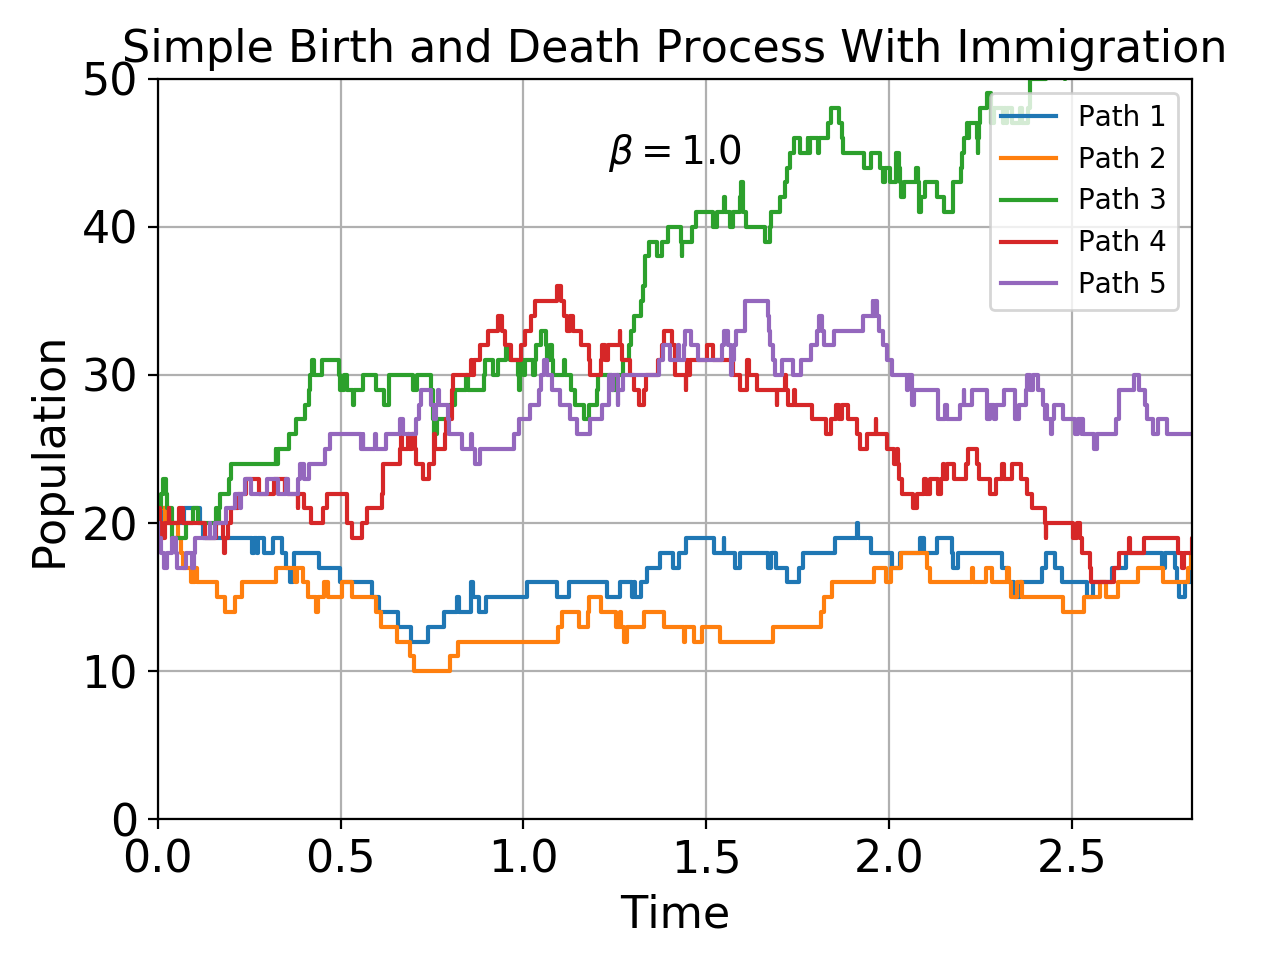

In [162]:
init_pop = 20 # initial population size
max_pop = 200 # maximal population size
birth_rate = 1.0 # birth rate
death_rate = 1.0 # death rate
immigration = 1.0 # immigration rate
realizations = 5

show_simple_birth_death_immigration_graph(birth_rate, death_rate, immigration, init_pop, max_pop, realizations)